 # Proyecto Volcano
 
 Datos obtenidos del grupo @Natura??

## Análisis exploratorio de los datos

En este cuaderno vamos a abrir y explorar en que consiste la base de datos.

Para ello, comenzamos importamos las bibliotecas que necesitaremos más adelante: pandas, numpy, pyploy (en matplotlib) y signal (en scipy).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

La base de datos, que se encuentra en el archivo "MicSigV1_v1_1.json", que utilizamos a continuación, fue conformada por el Instituto Geofísico de la Escuela Politécnica Nacional de Ecuador. Estos datos corresponden a un catálogo de diferentes eventos sísmicos registrados en el volcán Cotopaxi.

Como solo contamos con permiso para uso académico, no podemos compartir el archivo con terceros.

Entonces, leemos el archivo y hacemos una primera inspección de la serie de datos.

In [2]:
json_file = './dataset/MicSigV1_v1_1.json'
sism_events = pd.read_json(json_file)
# Mostramos el DataFrame con las primeros 5 filas, para tener una primera idea
sism_events.head(5)

,Network,Station,SampleRate,Component,Year,Month,Type,Duration,StartPoint,EndPoint,Data
0,EC,VC1,100,SHZ,2012,1,VT,23,1001,3301,"[23.355529956093186, -26.21249638722304, 7.478..."
1,EC,VC1,100,SHZ,2012,1,LP,47,1001,5701,"[-9.39456702711197, 5.797439374378022, -23.901..."
2,EC,VC1,100,SHZ,2012,1,LP,56,1001,6601,"[-3.915706523024276, 0.420532668769778, -21.37..."
3,EC,VC1,100,SHZ,2012,1,VT,49,1001,5901,"[-2.5686254658527723, 23.91770870655175, -10.7..."
4,EC,VC1,100,SHZ,2012,1,VT,31,1001,4101,"[55.05791051352128, 41.33929940327658, -19.424..."


Una breve descripción de las columnas que componen el DataFrame.

* **Network:** red sísmica;
* **Station:** nombre de la estación sísmica,
* **SampleRate:** cantidad de datos del digitalizador por unidad de tiempo (segundos);
* **Component:** conjunto de tres letras cuya última establece la dirección de medición. En este caso, Z indica la dirección vertical del movimiento.
* **Type:** tipo de evento sísmico;
* **Duration:** duración del evento, desde StartPoint hasta EndPoint, en segundos;
* **StartPoint:** inicio del evento en de la serie temporal del conjunto de datos (Data); > ¿por defecto siempre descarta los primeros 1000 puntos?
* **EndPoint:** fin del evento en de la serie temporal del conjunto de datos (Data);
* **Data:** conjunto de datos.

Los datos de mayor interés, son los grupos de datos que se encuentran en **Data**.
Todas nuestras columnas, o variables, parecen ser categóricas, salvo por Data.
Intentamos sacar información adicional, del resto de las columnas. Por ejemplo, cuantas redes y estaciones sísmicas hay.

In [3]:
sism_events.Network.value_counts()

EC    1187
Name: Network, dtype: int64

In [4]:
sism_events.Station.value_counts()

BREF    706
VC1     481
Name: Station, dtype: int64

Bien, contamos con un tipo de red sísmica (lo cual nos dice nada, se podría descartar) y dos estaciones sísmicas.
Ahora, veamos los tipos de componentes.

In [5]:
sism_events.Component.value_counts()

BHZ    706
SHZ    481
Name: Component, dtype: int64

Por último, tenemos los eventos sísmicos.

In [6]:
print('Nro. de eventos totales: ', len(sism_events.Type))
sism_events.Type.value_counts()

Nro. de eventos totales:  1187


LP          1044
VT           101
REGIONAL      27
HB             8
ICEQUAKE       7
Name: Type, dtype: int64

Cada evento sísmico refleja un proceso con origen en distintos tipos de fuente. Los sismos más destacados, en actividad volcánica, son:

**VT (volcano-tectonic):** son consecuencia de la ruptura frágil de la corteza;
**LP (long period):** se deben a la agitación de un sistema que involucra un fluido.

Quedemonos con los sismos tipos LP, que son los mayoritarios, y grafiquemos un conjunto de datos.

In [7]:
# Nuestro nuevo DataFrame, con solo eventos tipo LP
LP_events = sism_events[sism_events.Type == 'LP']

# N° de filas de LP_events
n_LP = len(LP_events)

# Otra forma, dimension
#dim_LP = LP_events.shape

# Nos quedamos con el primer evento
LP1 = LP_events.iloc[0]

(0.0, 10.0)

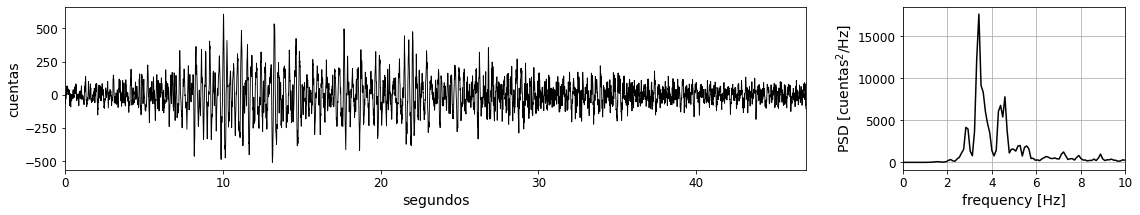

In [8]:
# forma de onda
LP_waveform = LP1.Data[LP1.StartPoint:LP1.EndPoint]

N_points = len(LP_waveform)


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

time = np.linspace(0, LP1.Duration, N_points)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 3), gridspec_kw=dict(width_ratios=[10,3]))

ax1.plot(time, LP_waveform, 'k', lw=0.9)
ax1.set_ylabel('cuentas')
ax1.set_xlabel('segundos')
ax1.set_xlim(0, LP1.Duration)

# PSD
f, PSD = signal.welch(LP_waveform, LP1.SampleRate, nperseg=1024, scaling='density')
ax2.plot(f, PSD, color='k')
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel(r'PSD [cuentas$^2$/Hz]')
ax2.grid()
ax2.set_xlim(0, 10)

## Planteando el problema

No todas las señales LP son iguales

NameError: name 'LPs' is not defined

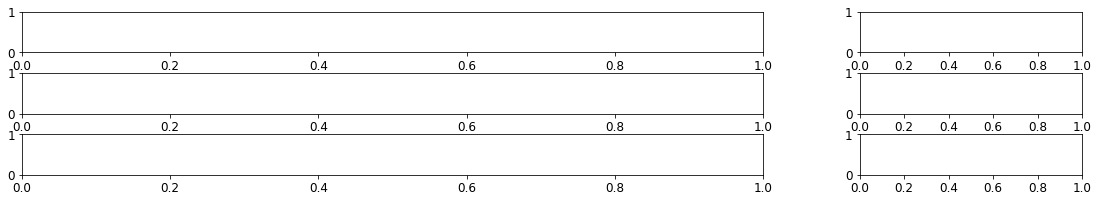

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(19, 3), gridspec_kw=dict(width_ratios=[10,3], hspace=0.5))
for k in range(3):
    LP_k = LPs.iloc[np.random.randint(0, 1044)]
    LP_waveform = LP_k.Data[LP_k.StartPoint:LP_k.EndPoint]
    N_points = len(LP_waveform)
    time = np.linspace(0, LP_k.Duration, N_points)
    axes[k][0].plot(time, LP_waveform, 'k', lw=0.9)
    axes[k][0].set_ylabel('cuentas')
    axes[k][0].set_xlabel('segundos')
    axes[k][0].set_xlim(0, LP_k.Duration)

    nps = 1024
    if N_points < nps:
        nps = 512

    f, PSD = signal.welch(LP_waveform, LP_k.SampleRate, nperseg=nps, scaling='density')
    axes[k][1].plot(f, PSD, color='k')
    axes[k][1].set_xlabel('freq. [Hz]')
    axes[k][1].set_ylabel(r'PSD')
    axes[k][1].grid()
    axes[k][1].set_xlim(0, 10)

Clasificando manualmente, en subgrupos a partir de un análisis visual.

## El objetivo del proyecto es: 

Diseñar un algortimo no-supervisado o semisupervisado a partir de features extraidos de las señales capaz de clasificar estos LP en subcategorias o subtipos